In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.svm import SVC
%matplotlib notebook

digits = load_digits()
X, y = digits.data, digits.target
for class_name, number_of_class in zip(digits.target_names, np.bincount(digits.target)):
    print(class_name, number_of_class)
y1 = y.copy()
y1[digits.target != 1] = 0

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


C:\Users\u0125384\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<IPython.core.display.Javascript object>


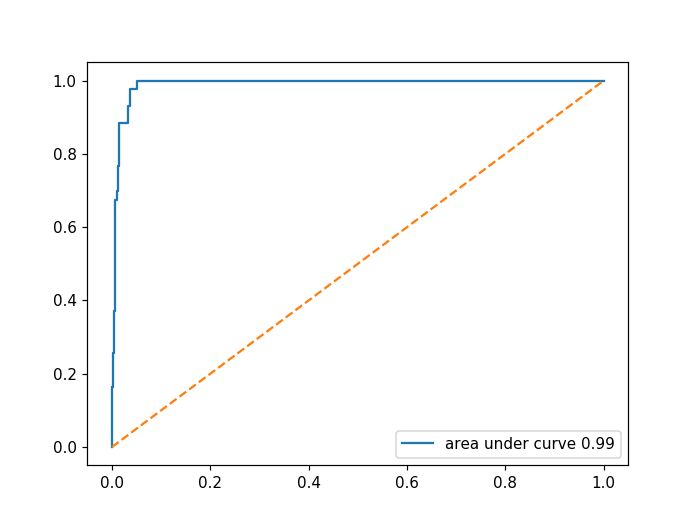

area under curve


In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, random_state = 0)
y_score_Logistic = LogisticRegression().fit(X_train, y_train).decision_function(X_test)
false_positive_Logistic, true_positive_Logistic, _ = roc_curve(y_test, y_score_Logistic)
area_under_curve = auc(false_positive_Logistic, true_positive_Logistic)
plt.plot(false_positive_Logistic, true_positive_Logistic, label = 'area under curve {:.2f}'.format(area_under_curve))
plt.plot([0,1], [0,1], linestyle = '--')
plt.legend()
print('area under curve'.format(area_under_curve))



<IPython.core.display.Javascript object>


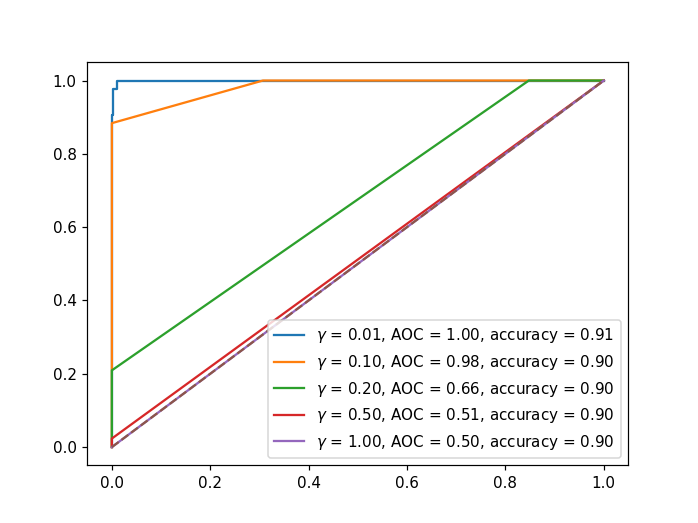

In [3]:
%matplotlib notebook

plt.figure()
for gamma_i in [0.01, 0.1, 0.2, 0.5, 1]:
    clf = SVC(gamma=gamma_i).fit(X_train, y_train)
    accuracy_score = clf.score(X_test, y_test)
    y_svc_score = SVC(gamma=gamma_i).fit(X_train, y_train).decision_function(X_test)
    false_positive_svc, true_positive_svc, _ = roc_curve(y_test, y_svc_score)
    area_under_curve = auc(false_positive_svc, true_positive_svc)
    plt.plot(false_positive_svc, true_positive_svc, 
             label = r'$\gamma$ = {:.2f}, AOC = {:.2f}, accuracy = {:.2f}'.format(gamma_i, area_under_curve, accuracy_score))
    plt.legend()
plt.plot([0,1],[0,1], linestyle = '--')